In [1]:
import os

MessageError: ignored

11490434/11490434 [==============================] - 0s 0us/step
5


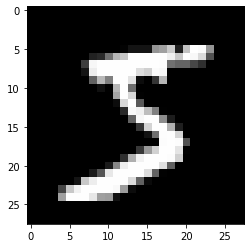

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_set = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 28, 28, 1]).astype(np.float32), train_labels.astype(np.int32)))
train_set = train_set.shuffle(buffer_size=60000).batch(128).repeat()

test_set = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 28, 28, 1]).astype(np.float32), test_labels.astype(np.int32))).batch(128)
print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

In [3]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
for image_batch, labels_batch in test_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 28, 28, 1)
(128,)
(128, 28, 28, 1)
(128,)


In [32]:
num_labels = len(train_labels)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  # tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  # tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  tf.keras.layers.Conv2D(64,  (3,3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  tf.keras.layers.Flatten(),
  # tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.build((None, 784)) 
train_steps = 2000

In [33]:
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 3136)            

In [34]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.08)  # tune this
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_set):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)
      
    optimizer.apply_gradients(zip(gradients, variables))
    
    train_acc_metric(label_batch, logits)
    
    if not step % 200:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Step {} Loss: {} Accuracy: {}".format(step, loss, train_acc_metric.result()))
        train_acc_metric.reset_states()
    del tape

Step 0 Loss: 2.3154239654541016 Accuracy: 0.1328125
Step 200 Loss: 0.1861569881439209 Accuracy: 0.8943750262260437
Step 400 Loss: 0.2244667410850525 Accuracy: 0.9458203315734863
Step 600 Loss: 0.2656990587711334 Accuracy: 0.9483338594436646
Step 800 Loss: 0.015504181385040283 Accuracy: 0.9434375166893005
Step 1000 Loss: 0.24690338969230652 Accuracy: 0.9436795711517334
Step 1200 Loss: 0.31081247329711914 Accuracy: 0.9485937356948853
Step 1400 Loss: 0.1685994565486908 Accuracy: 0.9464452862739563
Step 1600 Loss: 0.3957340717315674 Accuracy: 0.9447747468948364
Step 1800 Loss: 0.32948601245880127 Accuracy: 0.9431250095367432
Step 2000 Loss: 0.06330375373363495 Accuracy: 0.9458698630332947


In [35]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_set:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.9559000134468079


With Cifar10
---------------------------------------

170498071/170498071 [==============================] - 14s 0us/step
[6]


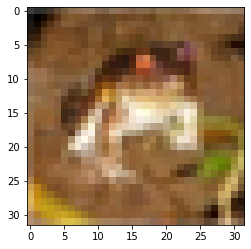

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
(train_images1, train_labels1), (test_images1, test_labels1) = tf.keras.datasets.cifar10.load_data()

train_set1 = tf.data.Dataset.from_tensor_slices(
    (train_images1.reshape([-1, 32, 32, 3]).astype(np.float32), train_labels1.astype(np.int32)))
train_set1 = train_set1.shuffle(buffer_size=60000).batch(128).repeat()

test_set1 = tf.data.Dataset.from_tensor_slices(
    (test_images1.reshape([-1, 32, 32, 3]).astype(np.float32), test_labels1.astype(np.int32))).batch(128)
print(train_labels1[0])
plt.imshow(train_images1[0], cmap="Greys_r")

In [9]:
num_labels = len(train_labels1)

model1 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(32, 32, 3)),
  tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  tf.keras.layers.Conv2D(64,  (3,3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10)
])
model1.build((None, 784)) 
train_steps = 2000

In [10]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model1.fit(train_images1, train_labels1, epochs=10, 
                    validation_data=(test_images1, test_labels1))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4472 - accuracy: 0.4776 - val_loss: 1.2388 - val_accuracy: 0.5539
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0598 - accuracy: 0.6252 - val_loss: 0.9910 - val_accuracy: 0.6528
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9050 - accuracy: 0.6807 - val_loss: 0.9409 - val_accuracy: 0.6731
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7923 - accuracy: 0.7212 - val_loss: 0.8788 - val_accuracy: 0.6943
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6989 - accuracy: 0.7560 - val_loss: 0.9022 - val_accuracy: 0.6880
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6159 - accuracy: 0.7834 - val_loss: 0.8804 - val_accuracy: 0.7036
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5455 - accuracy: 0.8086 - val_loss: 0.8710 - val_accuracy

313/313 - 1s - loss: 1.0053 - accuracy: 0.7126 - 703ms/epoch - 2ms/step


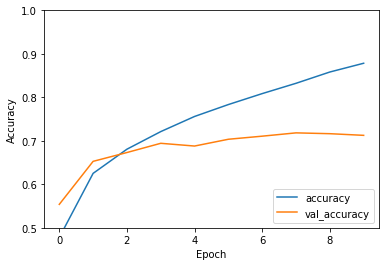

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(test_images1,  test_labels1, verbose=2)